# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

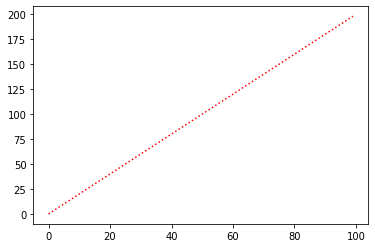

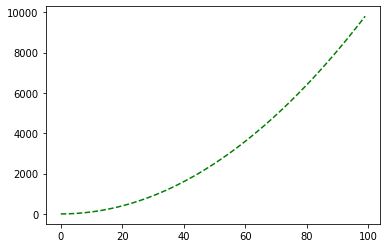

In [4]:
# Method 1
plt.plot(x, y, ls=':', color='r')
plt.show();

plt.plot(x, z, ls='--', color='g')
plt.show();

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

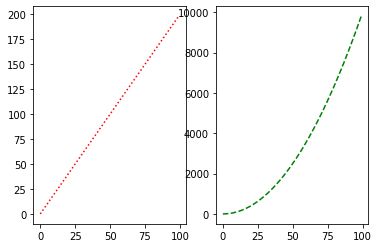

In [5]:
# Method 2
fig, axes = plt.subplots(ncols=2, nrows=1)

axes[0].plot(x, y, ls=':', color="r")
axes[1].plot(x, z, ls='--', color="g")

plt.show();

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

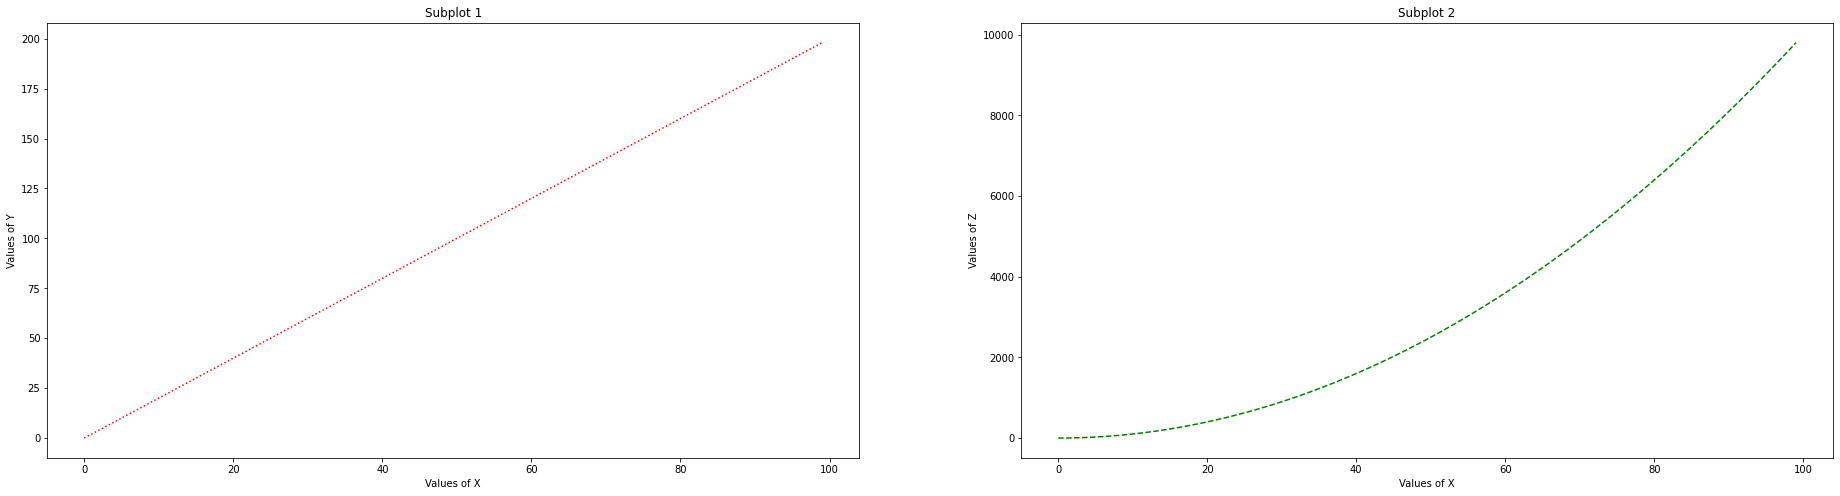

In [6]:
# your code here
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(32, 8))

axes[0].plot(x, y, ls=':', color="r")
axes[0].set_title('Subplot 1')
axes[0].set_xlabel('Values of X')
axes[0].set_ylabel('Values of Y')

axes[1].set_title('Subplot 2')
axes[1].plot(x, z, ls='--', color="g")
axes[1].set_xlabel('Values of X')
axes[1].set_ylabel('Values of Z')

plt.show();

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

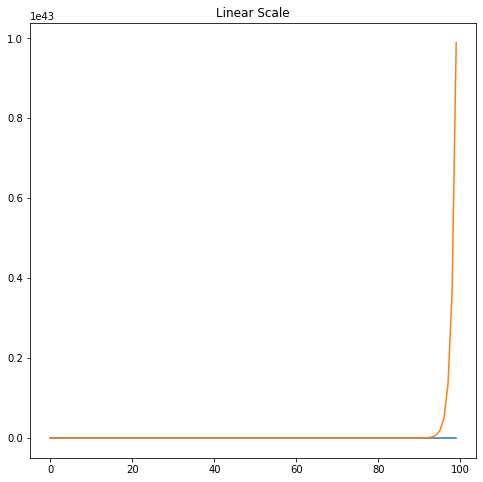

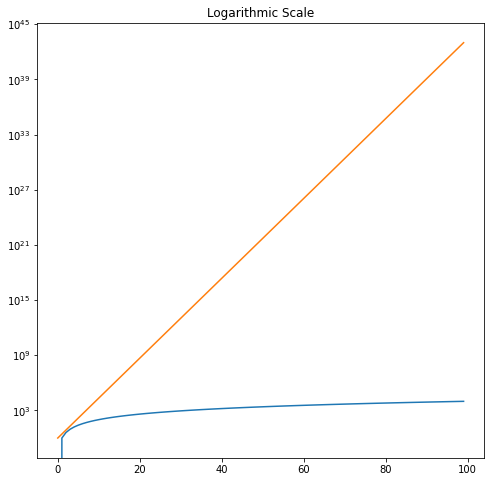

In [7]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.exp(x)

# Firt plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Linear Scale')
ax.set_yscale('linear')
ax.plot(x, y)
ax.plot(x, z)
plt.show();

# Second plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Logarithmic Scale')
ax.set_yscale('log')
ax.plot(x, y)
ax.plot(x, z)
plt.show();

#### As a bonus challenge, try to add a legend to the plot.

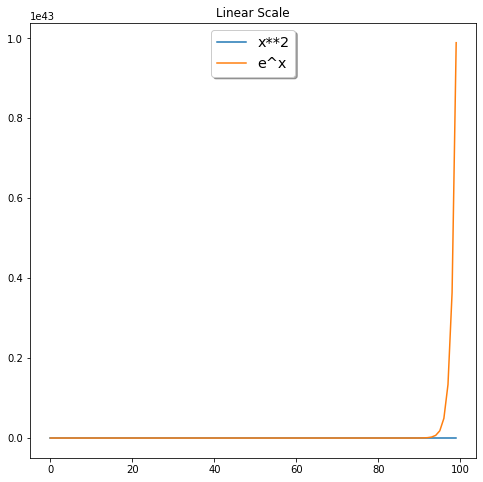

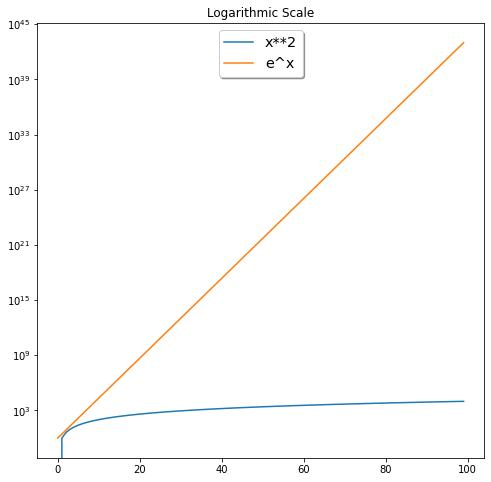

In [8]:
# your code here
x = np.arange(0,100)
y = x**2
z = np.exp(x)

# Firt plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Linear Scale')
ax.set_yscale('linear')
ax.plot(x, y, label='x**2')
ax.plot(x, z, label='e^x')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show();

# Second plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Logarithmic Scale')
ax.set_yscale('log')
ax.plot(x, y, label='x**2')
ax.plot(x, z, label='e^x')
legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')
plt.show();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
fitbit_df = pd.read_csv('../data/fitbit2.csv')

fitbit_df[["Steps", "Months_encoded", "Work_or_Weekend"]].head()

,Steps,Months_encoded,Work_or_Weekend
0,905,5,1
1,18925,5,0
2,14228,5,0
3,6756,5,1
4,502,5,1


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [10]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
df1 = fitbit_df[["Steps", "Months_encoded"]]
df_median_steps_by_month_encoded = df1.groupby("Months_encoded").median().reset_index()
display(df_median_steps_by_month_encoded)

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
df2 = fitbit_df[["Steps", "Work_or_Weekend"]]
df_median_steps_by_work_or_weekend = df2.groupby("Work_or_Weekend").median().reset_index()
display(df_median_steps_by_work_or_weekend)

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0
5,6,12935.5
6,7,10644.0
7,8,12213.0
8,9,9343.0
9,10,7865.0


,Work_or_Weekend,Steps
0,0,9998.0
1,1,10445.5


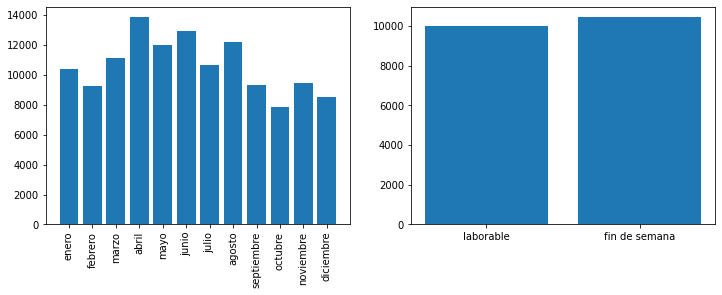

In [11]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

plt.sca(axes[0]) 
plt.bar(df_median_steps_by_month_encoded["Months_encoded"], df_median_steps_by_month_encoded["Steps"]) 

plt.sca(axes[1])
plt.bar(df_median_steps_by_work_or_weekend["Work_or_Weekend"], df_median_steps_by_work_or_weekend["Steps"])

axes[0].set_xticks(list(range(1,13)))
axes[0].set_xticklabels(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"], rotation=90)

axes[1].set_xticks([0,1])
axes[1].set_xticklabels(["laborable", "fin de semana"])

plt.show();

fig.savefig("figures/challenge2.jpg")

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [12]:
# your code here
field_list = ["Minutes Sedentary", "Minutes Lightly Active", "Minutes Very Active"]
fitbit_df[field_list].head()

,Minutes Sedentary,Minutes Lightly Active,Minutes Very Active
0,1.355,46,0
1,611.000,316,60
2,602.000,226,77
3,749.000,190,4
4,876.000,171,0


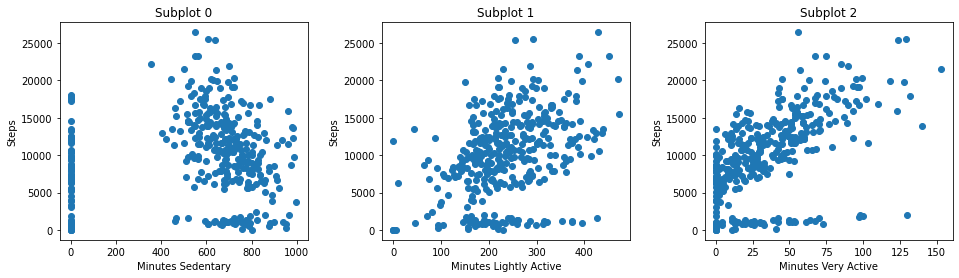

In [13]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16, 4))
fig.subplots_adjust(wspace = 0.3)

for i in range(len(field_list)):
    axes[i].scatter(x=fitbit_df[field_list[i]], y=fitbit_df["Steps"])
    axes[i].set_title(f'Subplot {i}')
    axes[i].set_xlabel(field_list[i])
    axes[i].set_ylabel('Steps')

plt.show();

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [14]:
# your code here
titanic = pd.read_csv("../data/titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [15]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [16]:
# NUMERICAL VARIABLES
numerical_types = ["int64", "float64"]
titanic.select_dtypes(include=numerical_types).dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [17]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(exclude=numerical_types).dtypes

Name        object
Gender      object
Ticket      object
Cabin       object
Embarked    object
dtype: object

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

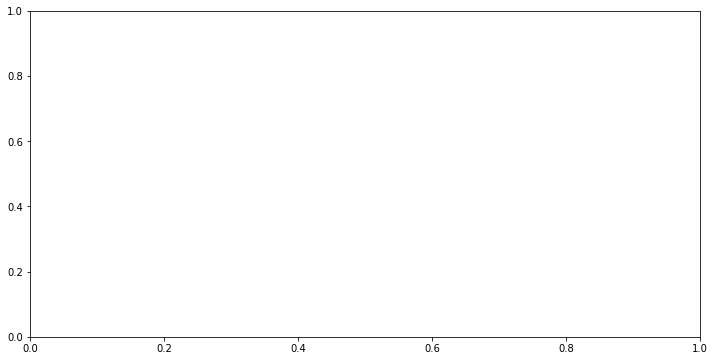

In [18]:
# your code here
fig, axes = plt.subplots(figsize=(12, 6))
plt.style.use("classic")

#### Use the right visulalization to show the distribution of column `Age`.

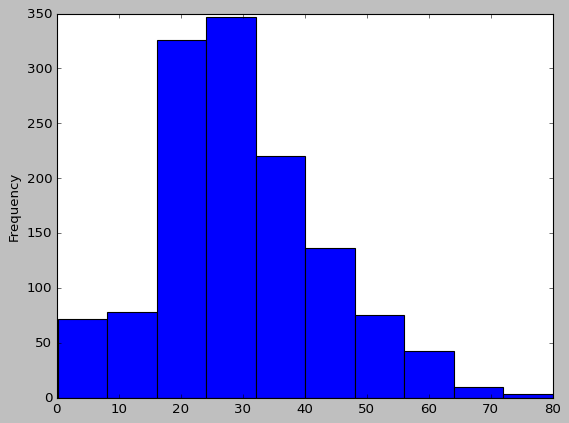

In [19]:
# your code here
titanic["Age"].plot(kind="hist")
plt.show();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

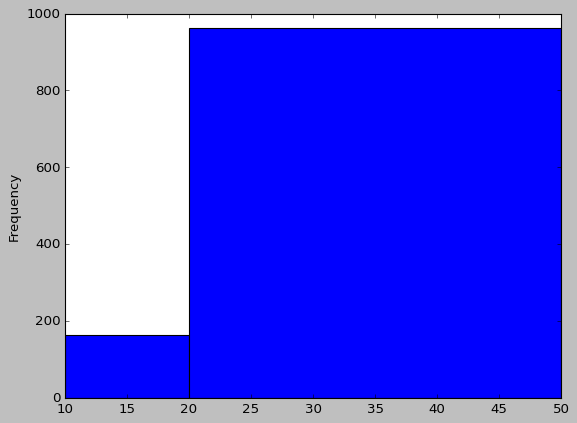

In [20]:
# your code here
titanic["Age"].plot(kind="hist", bins=[10, 20, 50])
plt.show();

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here

Los pasajeros entre 0 y 10 años no aparecen.
Del mismo modo, los pasajeros de más de 50 años tampoco aparecen.
El número de pasajeros se acumula en el rango entre 20 y 50 años. Se ve que hay más pasajeros entre los 20 y 50 años que entre 10 y 20.

"""

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age'>

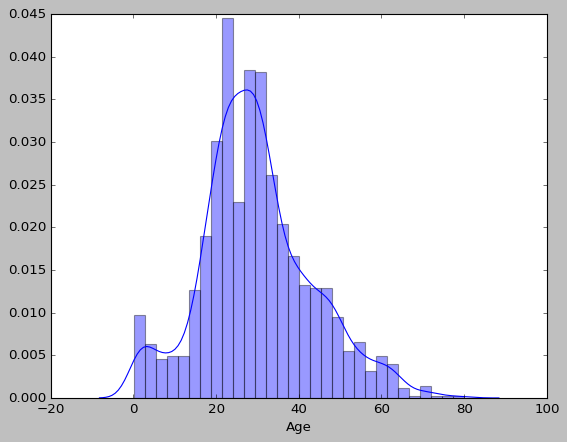

In [21]:
# your code here
import seaborn as sns

sns.distplot(titanic["Age"])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

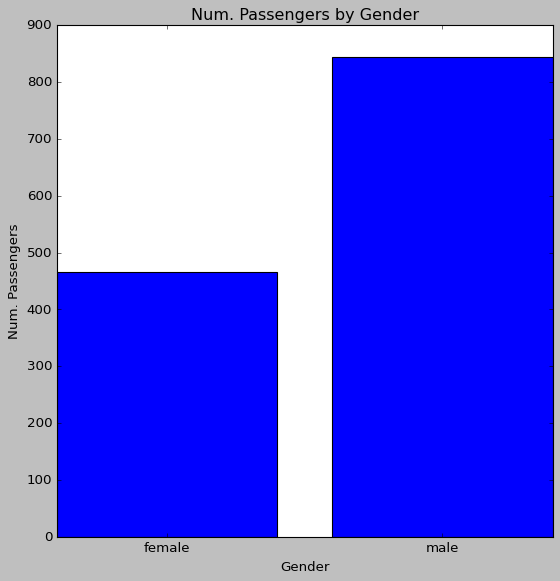

In [22]:
# Method 1 - matplotlib
# your code here
df_passengers_by_gender = titanic.groupby("Gender", as_index=True).count()["PassengerId"].reset_index()

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Num. Passengers by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Num. Passengers')

ax.bar(df_passengers_by_gender["Gender"], df_passengers_by_gender["PassengerId"])

plt.show();

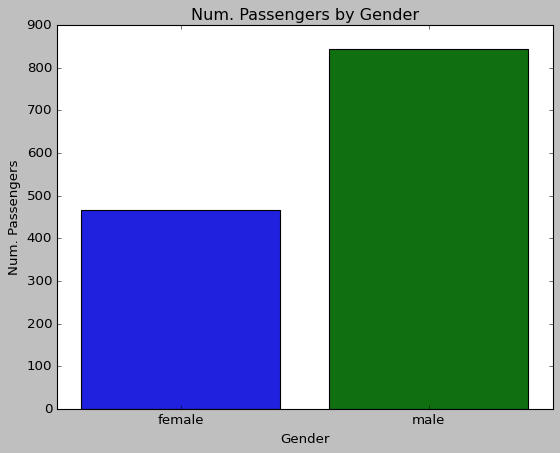

In [23]:
# Method 2 - seaborn
# your code here
ax = sns.barplot(df_passengers_by_gender["Gender"], df_passengers_by_gender["PassengerId"]).set(title="Num. Passengers by Gender", xlabel="Gender", ylabel="Num. Passengers")

plt.show();

#### Use the right plot to visualize the column `Pclass`.

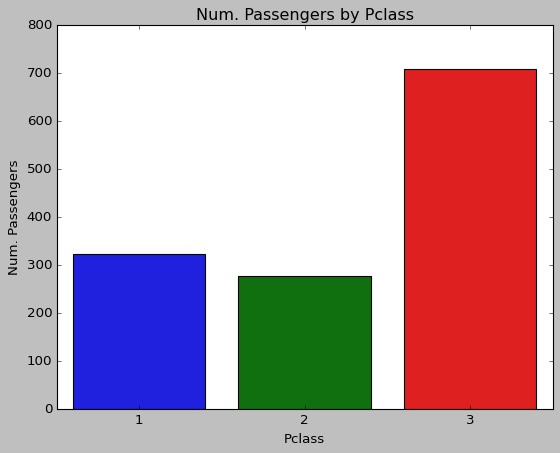

In [24]:
# your code here
df_passengers_by_pclass = titanic.groupby("Pclass", as_index=True).count()["PassengerId"].reset_index()

ax = sns.barplot(df_passengers_by_pclass["Pclass"], df_passengers_by_pclass["PassengerId"]).set(title="Num. Passengers by Pclass", xlabel="Pclass", ylabel="Num. Passengers")

plt.show();

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

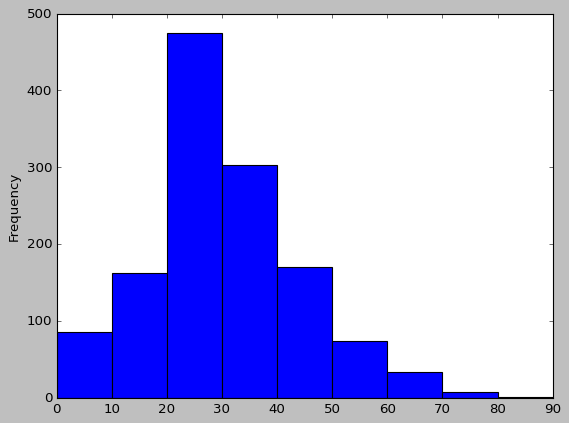

In [25]:
# your code here
titanic["Age"].plot(kind="hist", bins=list(range(0, 100, 10)))
plt.show();

In [ ]:
"""
your comments here

Usaria un barplot con 10 bins, uno para cada grupo de edad dividido en 10 años hasta 90 (el máximo es 80)
"""


#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

Las edades más comunes entre los pasajeros son entre 20 y 30 años y entre 30 y 40. Hay muy pocos pasajeros mayores de 50.
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

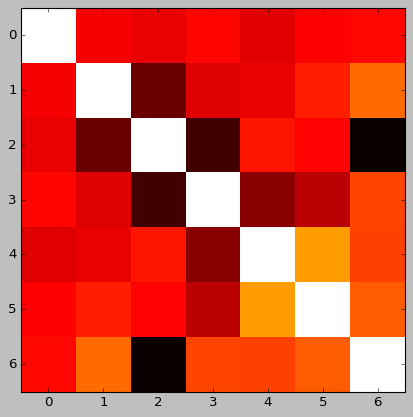

In [26]:
# Method 1 - matplotlib
# your code here
corrMatrix = titanic.corr()
#print(corrMatrix)
plt.imshow(corrMatrix, cmap='hot', interpolation='nearest')

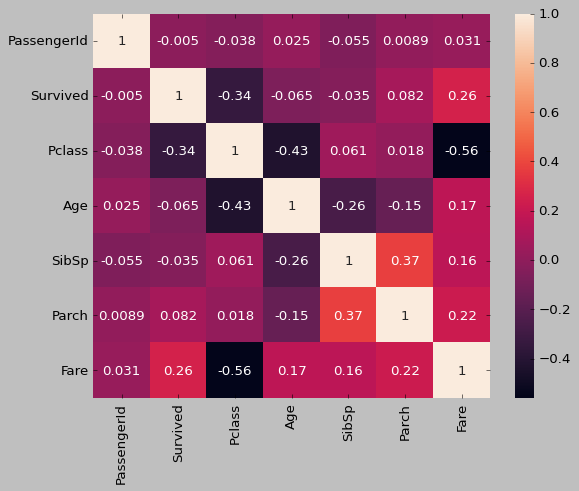

In [27]:
# Method 2 - seaborn
# your code here
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Plot the correlation matrix using seaborn.

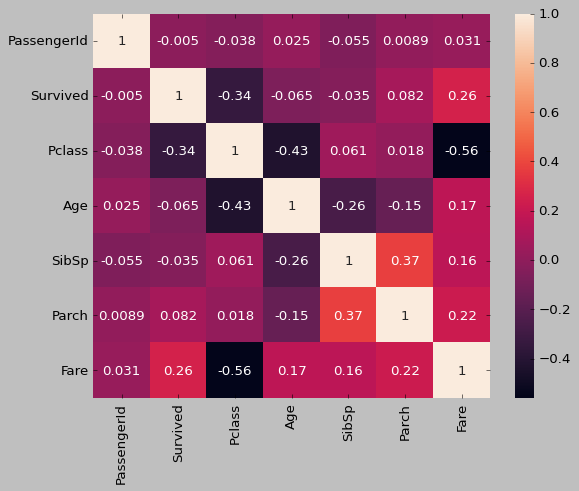

In [28]:
# your code here
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### What are the most correlated features?

In [ ]:
"""
your comments here

SibSp vs Parch
Survived vs Fare
Fare vs Parch
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

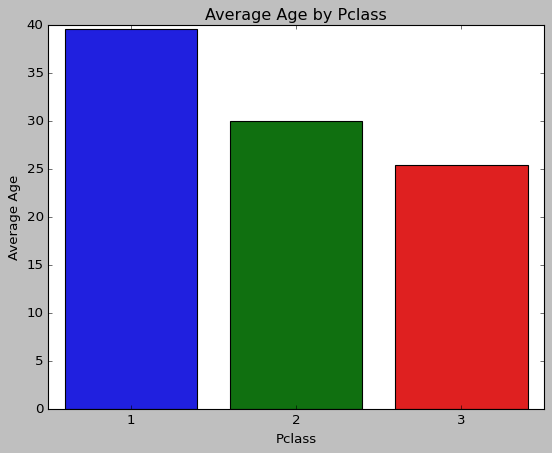

In [29]:
# your code here

df_mean_age_by_pclass = titanic.groupby("Pclass", as_index=True).mean()["Age"].reset_index()

ax = sns.barplot(df_mean_age_by_pclass["Pclass"], df_mean_age_by_pclass["Age"]).set(title="Average Age by Pclass", xlabel="Pclass", ylabel="Average Age")

plt.show();

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

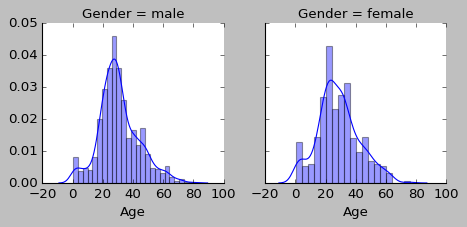

In [30]:
# your code here
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.distplot, "Age")

plt.show();